## TOC:

*[01. Importing libraries]

*[02. Importing data]

*[03. Task]

# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
#defining path

path = r'C:\Users\Jonathan\08-2023 Instacart Basket Analysis'

In [3]:
#importing libraries

df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Total Combined Data.pkl'))

# 03. Task

Bar Chart

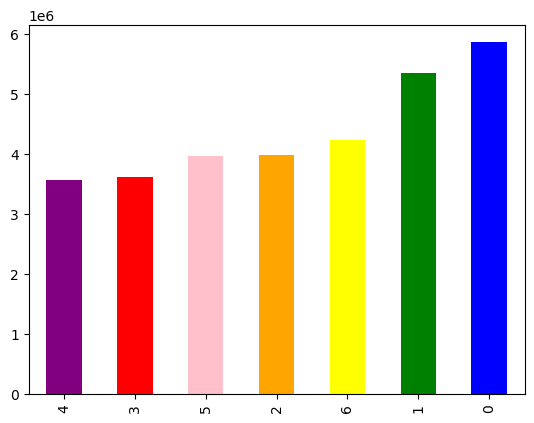

In [4]:
bar = df_instacart['order_day_of_week'].value_counts().sort_values().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [5]:
#checking for abnormal price values

df_instacart.loc[df_instacart['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
7680,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7681,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15000,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
19871,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20104,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30515866,2489526,106089,1,5,17,NaN,33664,4,0,2 % Reduced Fat Milk,...,Alan,Davidson,Male,District of Columbia,57,4/3/2019,1,married,215116,both
30538702,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
30541263,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
30559095,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [6]:
#removing abnormal values

df_instacart.loc[df_instacart['prices'] >100, 'prices'] = np.nan

In [7]:
#checking to see if abnormal values were removed

df_instacart['prices'].max()

25.0

Histogram

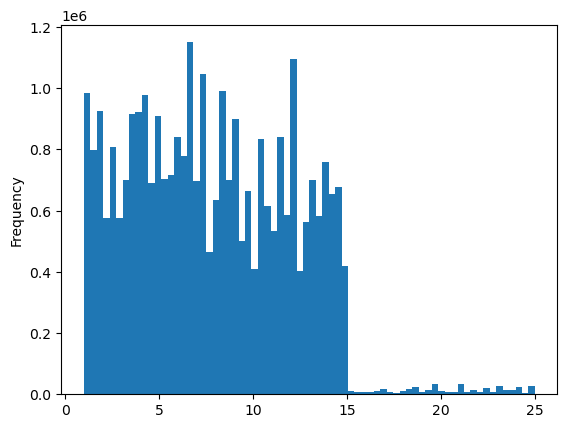

In [8]:
#creating a historgram with smaller bins

hist = df_instacart['prices'].plot.hist(bins = 70)

Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

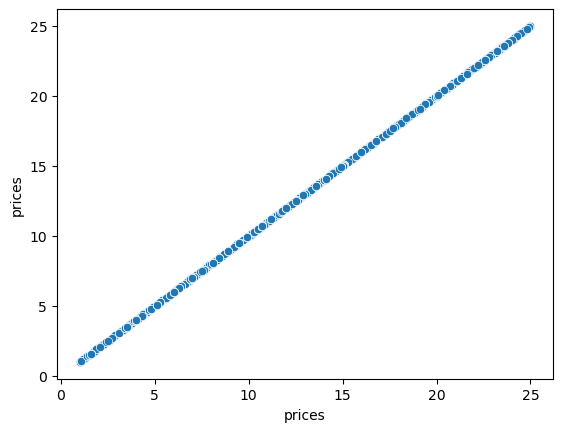

In [9]:
#making a scatterplot 

sns.scatterplot(x = 'prices', y = 'prices',data = df_instacart)

Line Graph

In [10]:
#Creating a list of True/False values to test np.random.rant() <= 0.7 using random seed 4

np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.7

In [11]:
#Defining 70% of sample in dataframe big

big = df_instacart[dev]

In [12]:
#Defining 30% of sample in dataframe small

small = df_instacart[~dev]

In [13]:
#creating a dataframe with only the columns needed

df_2 = small[['order_day_of_week', 'prices']]

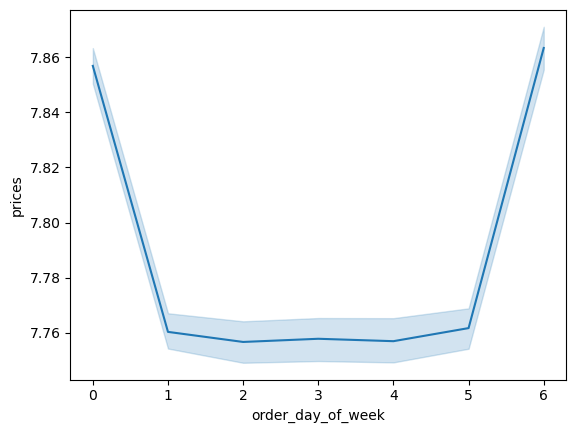

In [14]:
#creating line graph of order_day_of_week vs prices

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

# 04. Descriptive Analysis

Create a histogram of "order_hour_of_day" column

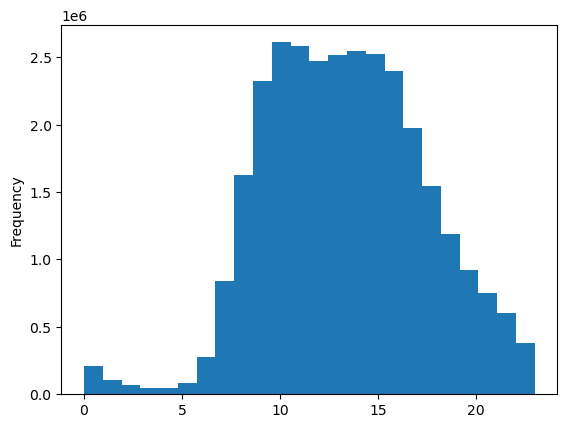

In [15]:
#creating histogram

hist_1 = df_instacart['order_hour_of_day'].plot.hist(bins = 24)

The histogram above demonstrates that peak ordering happens in mid-morning to the afternoon and drops off going later into the night and into the early morning;

In [16]:
#exporting visualization

hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_histogram.png'))

Create a bar chart from the "loyalty_flag" column

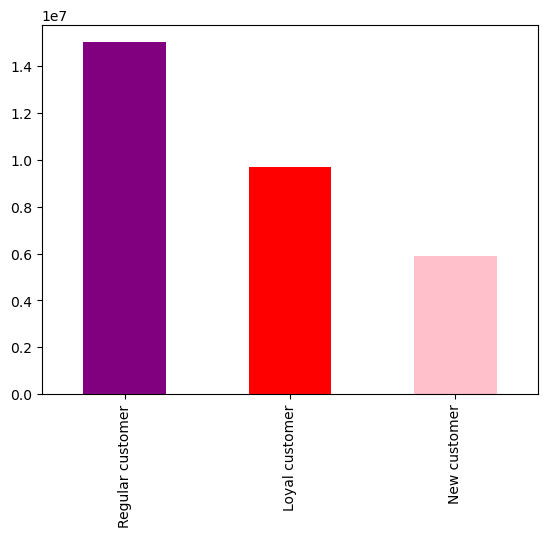

In [17]:
bar_1 = df_instacart['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'red', 'pink'])

In [18]:
#exporting visualization

bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_Bar_chart.png'))

Check whether there's a difference in expenditure depending on the hour of the day (Hint: To check this, you need to use an accurate sample for your line chart!)

In [19]:
#Creating a list of True/False values to test np.random.rant() <= 0.7 using random seed 4

np.random.seed(4)
dev_1 = np.random.rand(len(df_instacart)) <= 0.7

In [20]:
#Defining 70% of sample in dataframe big

big_1 = df_instacart[dev_1]

In [21]:
#Defining 30% of sample in dataframe small

small_1 = df_instacart[~dev_1]

In [22]:
#creating a dataframe with only the columns needed

df_3 = small_1[['order_hour_of_day', 'prices']]

In [23]:
#checking dataframe

df_3

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
30629722,14,10.7
30629724,3,10.7
30629729,18,10.7
30629737,11,8.1


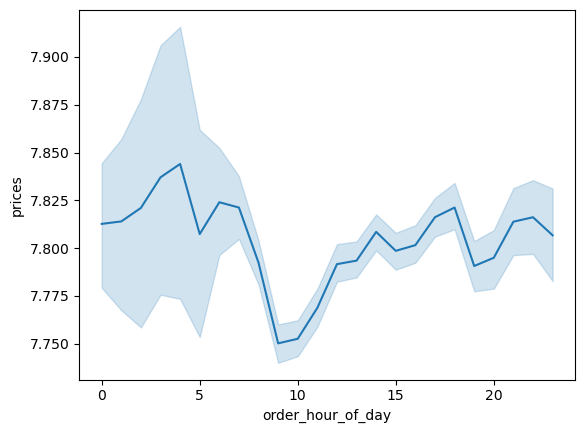

In [24]:
#creating a line chart of order_hour_of_day vs prices

line_1 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [25]:
#exporting visualization

line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_prices_line_chart.png'))

Expenditure drops and is lowest from about 9 in the morning and levels back in the afternoon;

Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [26]:
#creating a dataframe with only the columns needed

df_4 = small_1[['Age', 'dependants']]

In [27]:
df_4.describe()

,Age,dependants
count,9.187984e+06,9.187984e+06
mean,4.946386e+01,1.501680e+00
std,1.847767e+01,1.118523e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


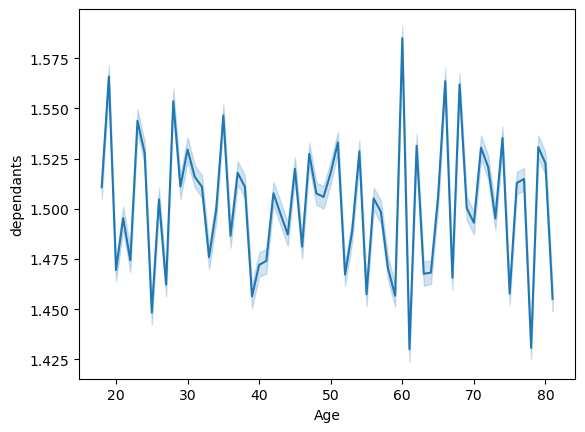

In [28]:
#creating a line chart of Age vs dependants

line_2 = sns.lineplot(data = df_4, x = 'Age', y = 'dependants')

In [29]:
#exporting visualization

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Dependants_line_chart.png'))

There does not seem to be a concrete connection between Age and Dependants; The chart shows that on average the number of dependants does not show a trend with age; 

You'll also need to explore whether there's a connection between age and spending power (income).

In [30]:
#creating a dataframe with only the columns needed

df_5 = small_1[['Age', 'income']]

In [31]:
#check for outliers/data that requires further investigation

df_5.describe()

,Age,income
count,9.187984e+06,9.187984e+06
mean,4.946386e+01,9.944121e+04
std,1.847767e+01,4.307811e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.702300e+04
50%,4.900000e+01,9.658700e+04
75%,6.500000e+01,1.279050e+05
max,8.100000e+01,5.939010e+05


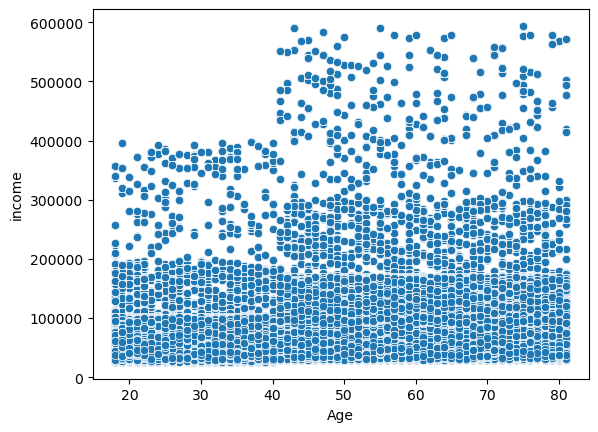

In [32]:
#making a scatterplot of Age vs Income

Scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_5)

In [33]:
#exporting visualization

Scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Income_scatterplot.png'))

The scatterplot shows that income is bunched lower no matter the age but, those with the highest income are all above the age of 40; 